# Reducción de Dimensionalidad. PCA


PCA es una técnica estadística introducida por el matemático Karl Pearson en 1901. 
- Funciona transformando los datos de alta dimensión en un espacio de baja dimensión a la vez que maximiza la varianza (o dispersión) de los datos en el nuevo espacio.
- Esto ayuda a preservar los patrones y relaciones más importantes en los datos.

"PCA = Reducir dimensiones, Preservar información"

**Saber más:** https://medium.com/all-about-ml/understanding-principal-component-analysis-pca-556778324b0e

In [2]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import accuracy_score, r2_score

import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("https://github.com/ricardoahumada/Python_for_Data_Science/raw/refs/heads/master/data/2008_small.zip",nrows = 1000000)


df = df.dropna(subset = ['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"])
df = df.sample(frac=1).head(1000)

X = df[['AirTime','Distance','TaxiIn','TaxiOut',"DepDelay","ArrDelay"]] 
columnas = X.columns

In [4]:
X

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
41862,42.0,224,20.0,10.0,-10.0,-8.0
536504,273.0,2475,8.0,27.0,0.0,-7.0
110166,138.0,983,13.0,32.0,-10.0,12.0
905667,83.0,508,10.0,13.0,-4.0,-14.0
454800,43.0,214,22.0,16.0,-7.0,-1.0
...,...,...,...,...,...,...
856611,109.0,733,7.0,44.0,40.0,31.0
553237,53.0,337,9.0,13.0,-4.0,-16.0
390860,78.0,533,16.0,16.0,0.0,7.0
90223,68.0,404,6.0,8.0,-5.0,-13.0


In [5]:
scaler = StandardScaler()   ## IMPORTANTISIMO ##
scaler.fit(X)

X = scaler.transform(X)

pca = PCA(n_components=2) # El numero de componentes son la cantidad de nuevas columnas que quiero
pca.fit(X)

PCA(n_components=2)

In [6]:
pca.components_

array([[ 0.47672175,  0.46819793,  0.17740469,  0.29008062,  0.45038661,
         0.48482965],
       [ 0.51016521,  0.51741713, -0.04216544, -0.10036409, -0.46737149,
        -0.49165434]])

In [7]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [8]:
X

array([[-0.97121085, -0.94194479,  2.32432846, -0.66065328, -0.64672943,
        -0.46562452],
       [ 2.52425845,  3.12641983,  0.16567653,  1.09502997, -0.31370706,
        -0.43533606],
       [ 0.48145172,  0.42984052,  1.06511483,  1.61140739, -0.64672943,
         0.14014471],
       ...,
       [-0.42646239, -0.38347093,  1.60477781, -0.04100037, -0.31370706,
        -0.0112976 ],
       [-0.5777814 , -0.61662021, -0.19409879, -0.86720425, -0.48021825,
        -0.61706683],
       [-1.07713416, -0.95640366, -0.19409879, -0.76392876, -0.51352048,
        -0.37475913]])

In [9]:
print(np.round(pca.components_,2)) # nuevas columnas x viejas columnas

[[ 0.48  0.47  0.18  0.29  0.45  0.48]
 [ 0.51  0.52 -0.04 -0.1  -0.47 -0.49]]


In [10]:
columnas

Index(['AirTime', 'Distance', 'TaxiIn', 'TaxiOut', 'DepDelay', 'ArrDelay'], dtype='object')

In [11]:
pd.DataFrame(np.round(pca.components_,2),columns=columnas)

# 1a componente, vuelos largos y retrasos altos (vuelos cortos, retrasos bajos)
# 2a componente, vuelos cortos y retrasos altos (vuelos largos, retrasos bajos)

,AirTime,Distance,TaxiIn,TaxiOut,DepDelay,ArrDelay
0,0.48,0.47,0.18,0.29,0.45,0.48
1,0.51,0.52,-0.04,-0.10,-0.47,-0.49


>La interpretación de los datos se relaciona de manera directa con las columnas originales

In [12]:
print(pca.explained_variance_ratio_)

[0.37421336 0.30223807]


In [13]:
nuevosvalores = pca.transform(X)
nuevosvalores

array([[-1.20033672, -0.48336762],
       [ 2.66183767,  3.14921712],
       [ 0.8638314 ,  0.49474843],
       ...,
       [-0.25680936, -0.32735965],
       [-1.3655906 ,  0.00923049],
       [-1.63029154, -0.53526395]])

>Visualizar la transformación del espacio

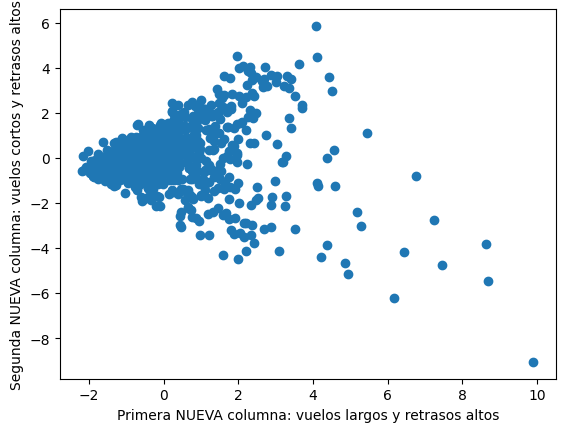

In [14]:
plt.scatter(nuevosvalores[:,0],nuevosvalores[:,1],)
plt.xlabel("Primera NUEVA columna: vuelos largos y retrasos altos")
plt.ylabel("Segunda NUEVA columna: vuelos cortos y retrasos altos")
plt.show()